#                                        WhatsApp Group Chat Analysis

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def startsWithDate(line):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9][0-9])'
    result = re.match(pattern, line)
    if result:
        return True
    return False

In [3]:
def separationOfData(lines):
    data , time , author , halfMessage , authorAction = None , None , None , None , None
    line = lines.split('-')
    dateTime = line[0]
    date , time = dateTime.split(',')
    # print(date , time)
    authorMessage = line[1]
    if ': ' in authorMessage:
        authorMessage = authorMessage.split(': ')
        author = authorMessage[0]
        halfMessage = ''.join(authorMessage[1:])

    else:
        authorAction = line[1]

    return date , time , author , halfMessage ,authorAction

In [4]:
intermediate =[]
finalData  = []
def joinMultiLines(lines):
    if startsWithDate(lines) and intermediate:
        finalData.append(' '.join(intermediate))
        intermediate.clear()
    intermediate.append(lines)
    return finalData

In [5]:
chatFile = open('ChatConversation.txt', 'r' , encoding="utf8")

for lines in chatFile:
    multiLineList = joinMultiLines(lines)

In [6]:
chatList = []
for element in multiLineList:
    date , time , author , message , authorAction = separationOfData(element)
    chatList.append([date,time,author,message,authorAction])

In [7]:
chatDataframe = pd.DataFrame(chatList , columns = ['Date','Time','Author','Message','AuthorAction'])
chatDataframe.head()

,Date,Time,Author,Message,AuthorAction
0,7/15/16,19:27,Nandhakumar Muthusamy,Kekka nalla than iruuku da. Padravanga kastam ...,None
1,7/22/16,10:19,Nandhakumar Muthusamy,Ok. Here too 28$ for today\n,None
2,7/22/16,10:19,Nandhakumar Muthusamy,From tomorrow 20$\n,None
3,7/22/16,10:19,Uma Gurusamy,No mams. Athulam summa scene podranga. But com...,None
4,7/22/16,10:20,Uma Gurusamy,U ppl are planning to go ah mama\n,None


In [8]:
chatDataframe.tail()

,Date,Time,Author,Message,AuthorAction
8263,9/11/20,21:15,Uma Gurusamy,Super. 🥰\n,None
8264,9/11/20,21:18,Prameela Gurusamy,This message was deleted\n,None
8265,9/11/20,21:33,Angulakshmi Dhandapani,Super da\n,None
8266,9/11/20,21:39,Angulakshmi Dhandapani,Rochit kutty super\n,None
8267,9/11/20,22:04,AmshaPriya Nandhakumar,Dimple kutty cute\n,None


In [9]:
Authors = list(filter(None,chatDataframe['Author'].unique()))
Authors

[' Nandhakumar Muthusamy',
 ' Uma Gurusamy',
 ' AmshaPriya Nandhakumar',
 ' Sri',
 ' Rama Prabha Gurusamy',
 ' Ammayi Airtel',
 ' Prameela Gurusamy',
 ' Thatha',
 ' Angulakshmi Dhandapani',
 ' Ammayi']

In [10]:
authorActionDetails = chatDataframe[chatDataframe['AuthorAction'].notnull() ]
authorActionDetails.head()

,Date,Time,Author,Message,AuthorAction
446,9/7/16,21:45,None,None,Uma Gurusamy's security code changed. Tap for...
450,9/11/16,20:08,None,None,Uma Gurusamy's security code changed. Tap for...
719,10/9/16,15:47,None,None,AmshaPriya Nandhakumar's security code change...
720,10/10/16,20:15,None,None,AmshaPriya Nandhakumar added Prameela Gurusamy\n
848,11/14/16,08:33,None,None,Uma Gurusamy's security code changed. Tap for...


In [17]:
addedDetails = authorActionDetails[authorActionDetails['AuthorAction'].str.contains('added')]
addedDetails['AuthorAction'] = authorActionDetails['AuthorAction'].str.replace('\n','')
addedDetails

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Time,Author,Message,AuthorAction
720,10/10/16,20:15,None,None,AmshaPriya Nandhakumar added Prameela Gurusamy
1394,5/10/17,11:31,None,None,AmshaPriya Nandhakumar added Angulakshmi Dhan...
1811,8/22/17,13:38,None,None,AmshaPriya Nandhakumar added Uma Gurusamy
1812,8/22/17,13:38,None,None,AmshaPriya Nandhakumar added Thatha
1813,8/22/17,13:39,None,None,AmshaPriya Nandhakumar added Rama Prabha Guru...
2051,11/2/17,19:59,None,None,AmshaPriya Nandhakumar added Uma Gurusamy
6500,9/24/19,08:32,None,None,Nandhakumar Muthusamy added Angulakshmi Dhand...


In [47]:
splitAction = addedDetails['AuthorAction'].str.split('added',n=1,expand=True)
addedDetails['Added By'] = splitAction[0]
addedDetails['Added Person'] = splitAction[1]
addedDetail = addedDetails.drop( columns =['Author','Message','AuthorAction'],axis =1,inplace=False)
addedDetail


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Time,Added By,Added Person
720,10/10/16,20:15,AmshaPriya Nandhakumar,Prameela Gurusamy
1394,5/10/17,11:31,AmshaPriya Nandhakumar,Angulakshmi Dhandapani
1811,8/22/17,13:38,AmshaPriya Nandhakumar,Uma Gurusamy
1812,8/22/17,13:38,AmshaPriya Nandhakumar,Thatha
1813,8/22/17,13:39,AmshaPriya Nandhakumar,Rama Prabha Gurusamy
2051,11/2/17,19:59,AmshaPriya Nandhakumar,Uma Gurusamy
6500,9/24/19,08:32,Nandhakumar Muthusamy,Angulakshmi Dhandapani


In [51]:
leftDetails = authorActionDetails[authorActionDetails['AuthorAction'].str.contains('left')]
leftDetails['AuthorAction'] = authorActionDetails['AuthorAction'].str.replace('\n','')
leftDetails = leftDetails.drop(columns=['Author','Message'],axis =1,inplace = False)
leftDetails

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Time,AuthorAction
1749,7/21/17,08:14,Uma Gurusamy left
1773,8/17/17,11:55,Rama Prabha Gurusamy left
2026,10/18/17,13:29,Uma Gurusamy left
2632,1/29/18,08:30,Angulakshmi Dhandapani left


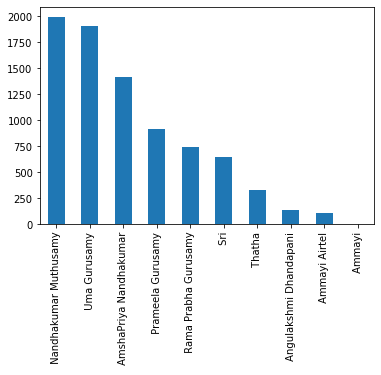

In [27]:
plt.figure()
talkative = chatDataframe.Author.value_counts()
talkative.plot(kind = 'bar')
plt.show()

In [21]:
talkative = chatDataframe.Author.value_counts()
print(type(talkative))
print(talkative.size)
print(talkative[:1])
# talkative.plot.barh()

<class 'pandas.core.series.Series'>
10
 Nandhakumar Muthusamy    1991
Name: Author, dtype: int64


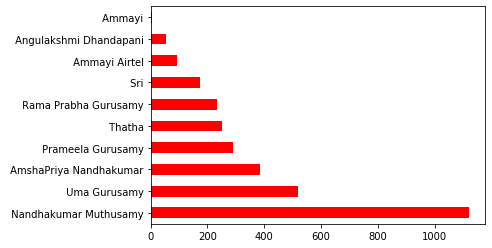

In [14]:
mediaMessage = chatDataframe[chatDataframe['Message']=='<Media omitted>\n']
highMediaSender = mediaMessage.Author.value_counts()
highMediaSender.plot.barh(color = 'red')

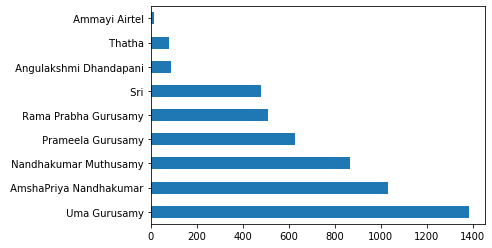

In [24]:
nonMediaMessage = chatDataframe[chatDataframe['Message']!='<Media omitted>\n']
nonMediaTalkative = nonMediaMessage.Author.value_counts()
nonMediaTalkative.plot.barh(color = 'green')

In [17]:
authorDataset = chatDataframe.Author.unique()
author = authorDataset.tolist()
uniqueAuthor = list(filter(None,author))
print(uniqueAuthor)

[' Nandhakumar Muthusamy', ' Uma Gurusamy', ' AmshaPriya Nandhakumar', ' Sri', ' Rama Prabha Gurusamy', ' Ammayi Airtel', ' Prameela Gurusamy', ' Thatha', ' Angulakshmi Dhandapani', ' Ammayi']


In [ ]:
countRows = []
def countOccurence(rowValueFilter,cols):
    new_df = chatDataframe[(chatDataframe[cols]== rowValueFilter) & (chatDataframe[cols].notnull())]
    convertingList = new_df[cols].tolist()
    countRows.append(len(convertingList))
    return countRows

In [29]:
splitTime= chatDataframe["Time"].str.split(":",n= 1, expand = True)
chatDataframe["Hours"] = splitTime[0]
chatDataframe["Mins"] = splitTime[1]
chatDataframe

,Date,Time,Author,Message,AuthorAction,Hours,Mins
0,7/15/16,19:27,Nandhakumar Muthusamy,Kekka nalla than iruuku da. Padravanga kastam ...,None,19,27
1,7/22/16,10:19,Nandhakumar Muthusamy,Ok. Here too 28$ for today\n,None,10,19
2,7/22/16,10:19,Nandhakumar Muthusamy,From tomorrow 20$\n,None,10,19
3,7/22/16,10:19,Uma Gurusamy,No mams. Athulam summa scene podranga. But com...,None,10,19
4,7/22/16,10:20,Uma Gurusamy,U ppl are planning to go ah mama\n,None,10,20
...,...,...,...,...,...,...,...
8263,9/11/20,21:15,Uma Gurusamy,Super. 🥰\n,None,21,15
8264,9/11/20,21:18,Prameela Gurusamy,This message was deleted\n,None,21,18
8265,9/11/20,21:33,Angulakshmi Dhandapani,Super da\n,None,21,33
8266,9/11/20,21:39,Angulakshmi Dhandapani,Rochit kutty super\n,None,21,39


In [ ]:
timeTexted = chatDataframe.Hours.unique()
hour = timeTexted.tolist()
hrs = list(filter(None,hour))
hrs.sort()
print(hrs)